In [1]:
%load_ext autoreload
%autoreload 2


# Import Modules

In [2]:
from modules.data_aggregation.land_coverage import get_data, get_map, get_data_clipped, split_GeoDataFrame_smaller_pixels, split_data
from modules.data_aggregation.building_data import get_full_landuse_coverage
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon, Point

# How to get the data

In [3]:
paris_gpd = get_data()

In [4]:
paris_gpd.head()

,OBJECTID,c_zonage,c_zonage_brut,Shape_Length,Shape_Area,categories,geometry,geometry_coordinates
0,116260,3,UEL1,190.138408,1790.746846,Residential Zone,"POLYGON ((2.17655 48.88660, 2.17664 48.88667, ...","[(2.176552607742814, 48.886604135480674), (2.1..."
1,116261,5,UF,730.014425,13519.202675,Dense Mixed Zone,"POLYGON ((2.29638 48.81655, 2.29663 48.81670, ...","[(2.296376577748363, 48.81655058432724), (2.29..."
2,116262,3,UM,96.071430,534.197866,Residential Zone,"POLYGON ((2.43997 48.85262, 2.43973 48.85264, ...","[(2.439965235849183, 48.85262139206868), (2.43..."
3,116263,7,U6,729.153446,30753.935854,Public Infrastructure,"POLYGON ((2.48415 48.81079, 2.48407 48.81067, ...","[(2.484149749468663, 48.81078972212672), (2.48..."
4,116264,6,UB,1014.674374,22111.953704,Semi-Dense Mixed Zone,"POLYGON ((2.47546 48.87302, 2.47513 48.87311, ...","[(2.475457414359798, 48.873020652134294), (2.4..."


# Checking that the coordinates are clockwise

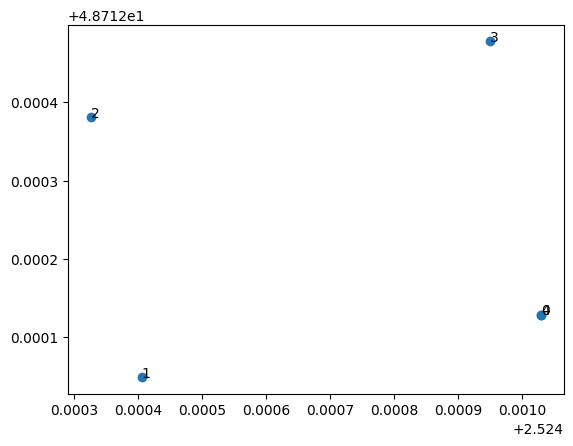

In [5]:
test = paris_gpd.geometry_coordinates[30]
x_test = [coord[0] for coord in test]
y_test = [coord[1] for coord in test]

fig, ax = plt.subplots()
ax.scatter(x_test, y_test)

for i in range(len(x_test)):
    ax.annotate(i, (x_test[i], y_test[i]))

# How to get the map of Paris with information on land use

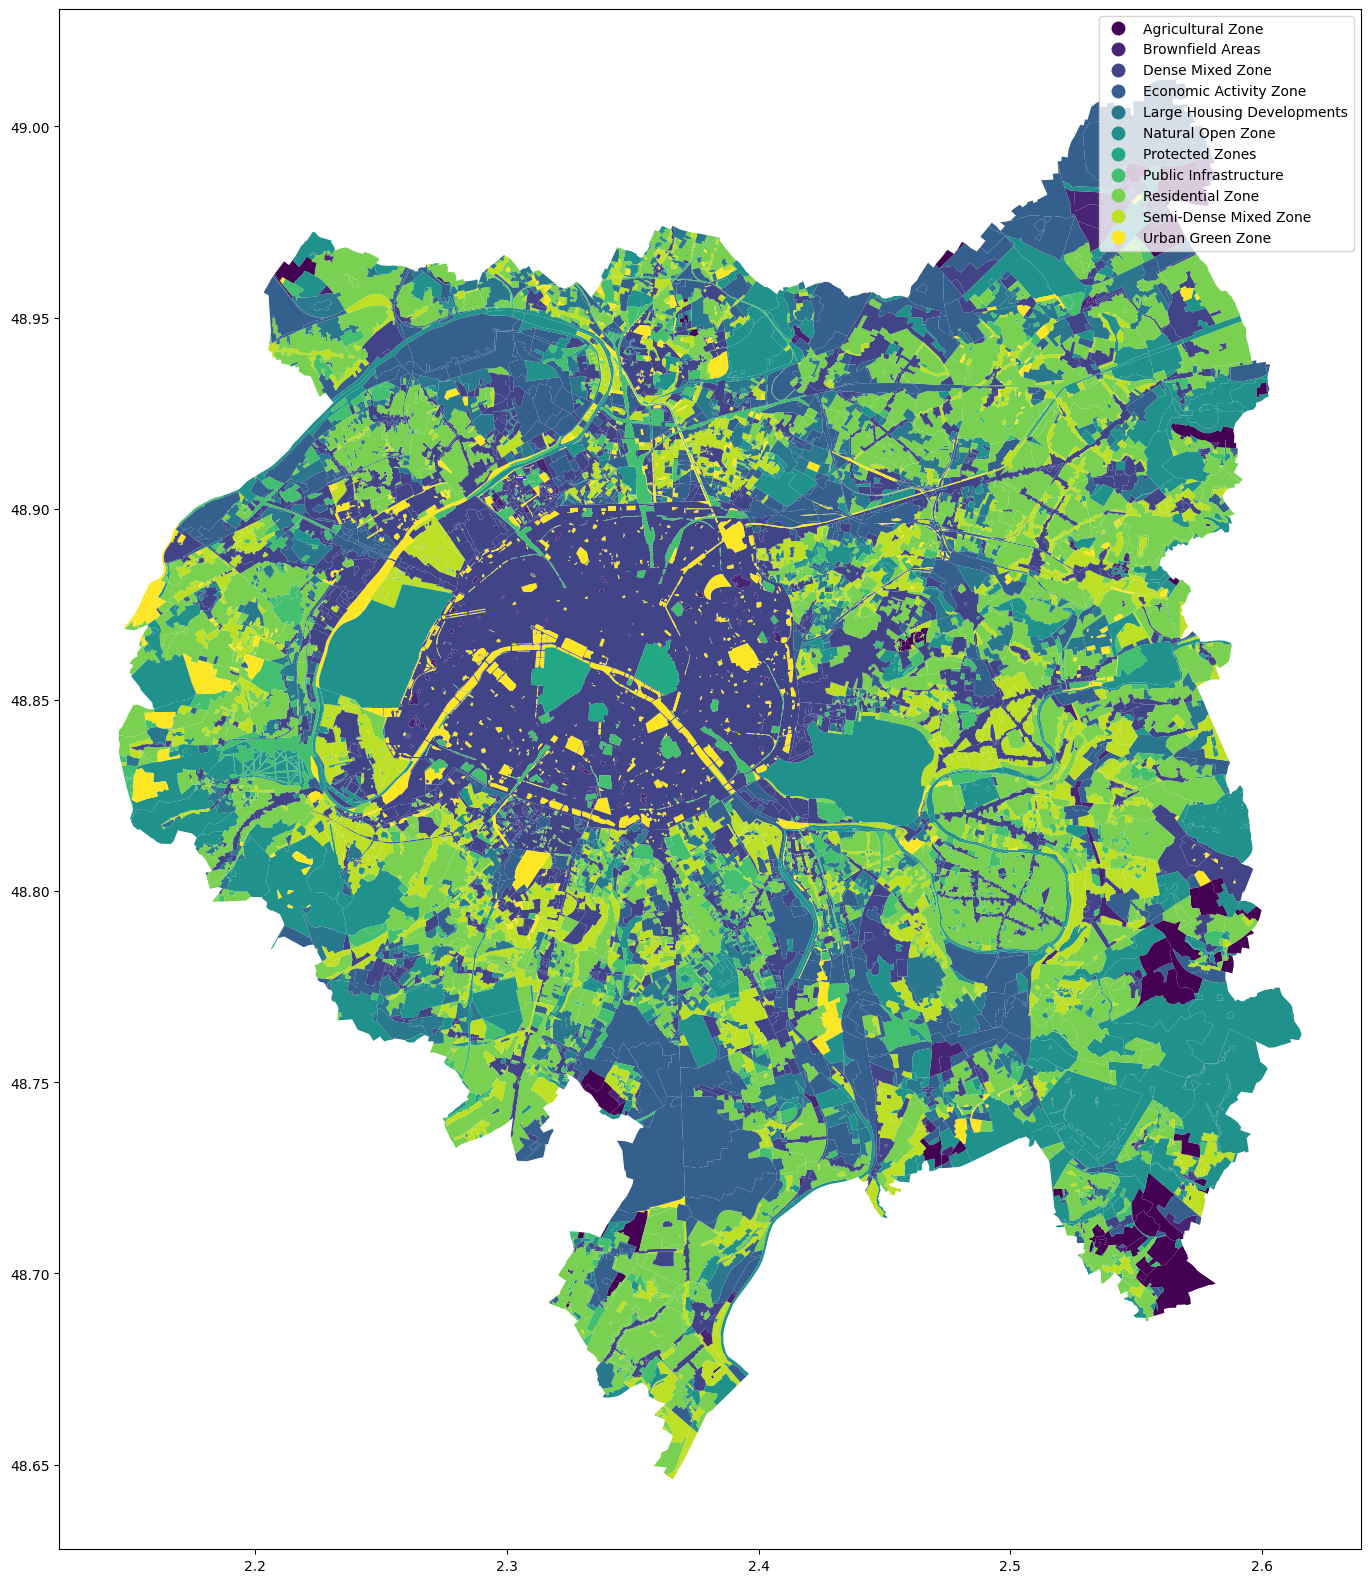

In [6]:
map = get_map(paris_gpd)

# Get clipped Dataframe and Map of Paris with only the areas of interest for our analysis

For the time being our map of Paris is too large, the area which interests us is shown below in the red box

In [7]:
polygon = Polygon([(2.264216,48.813898),(2.264216,48.900502),(2.42172,48.900502),(2.42172,48.813898),(2.264216,48.813898)])
poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=paris_gpd.crs.to_string())

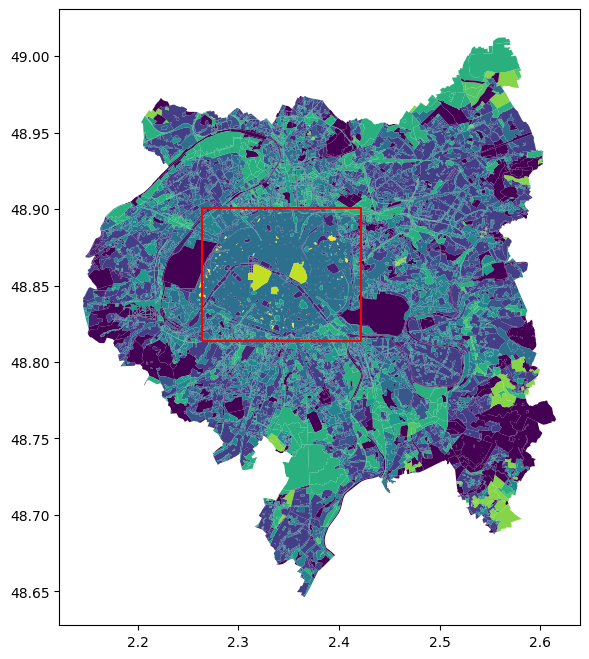

In [8]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 8))
paris_gpd.plot(ax=ax1, column = "c_zonage")
poly_gdf.boundary.plot(ax=ax1, color="red")
plt.show()

In [9]:
paris_clipped = get_data_clipped(paris_gpd)

<AxesSubplot: >

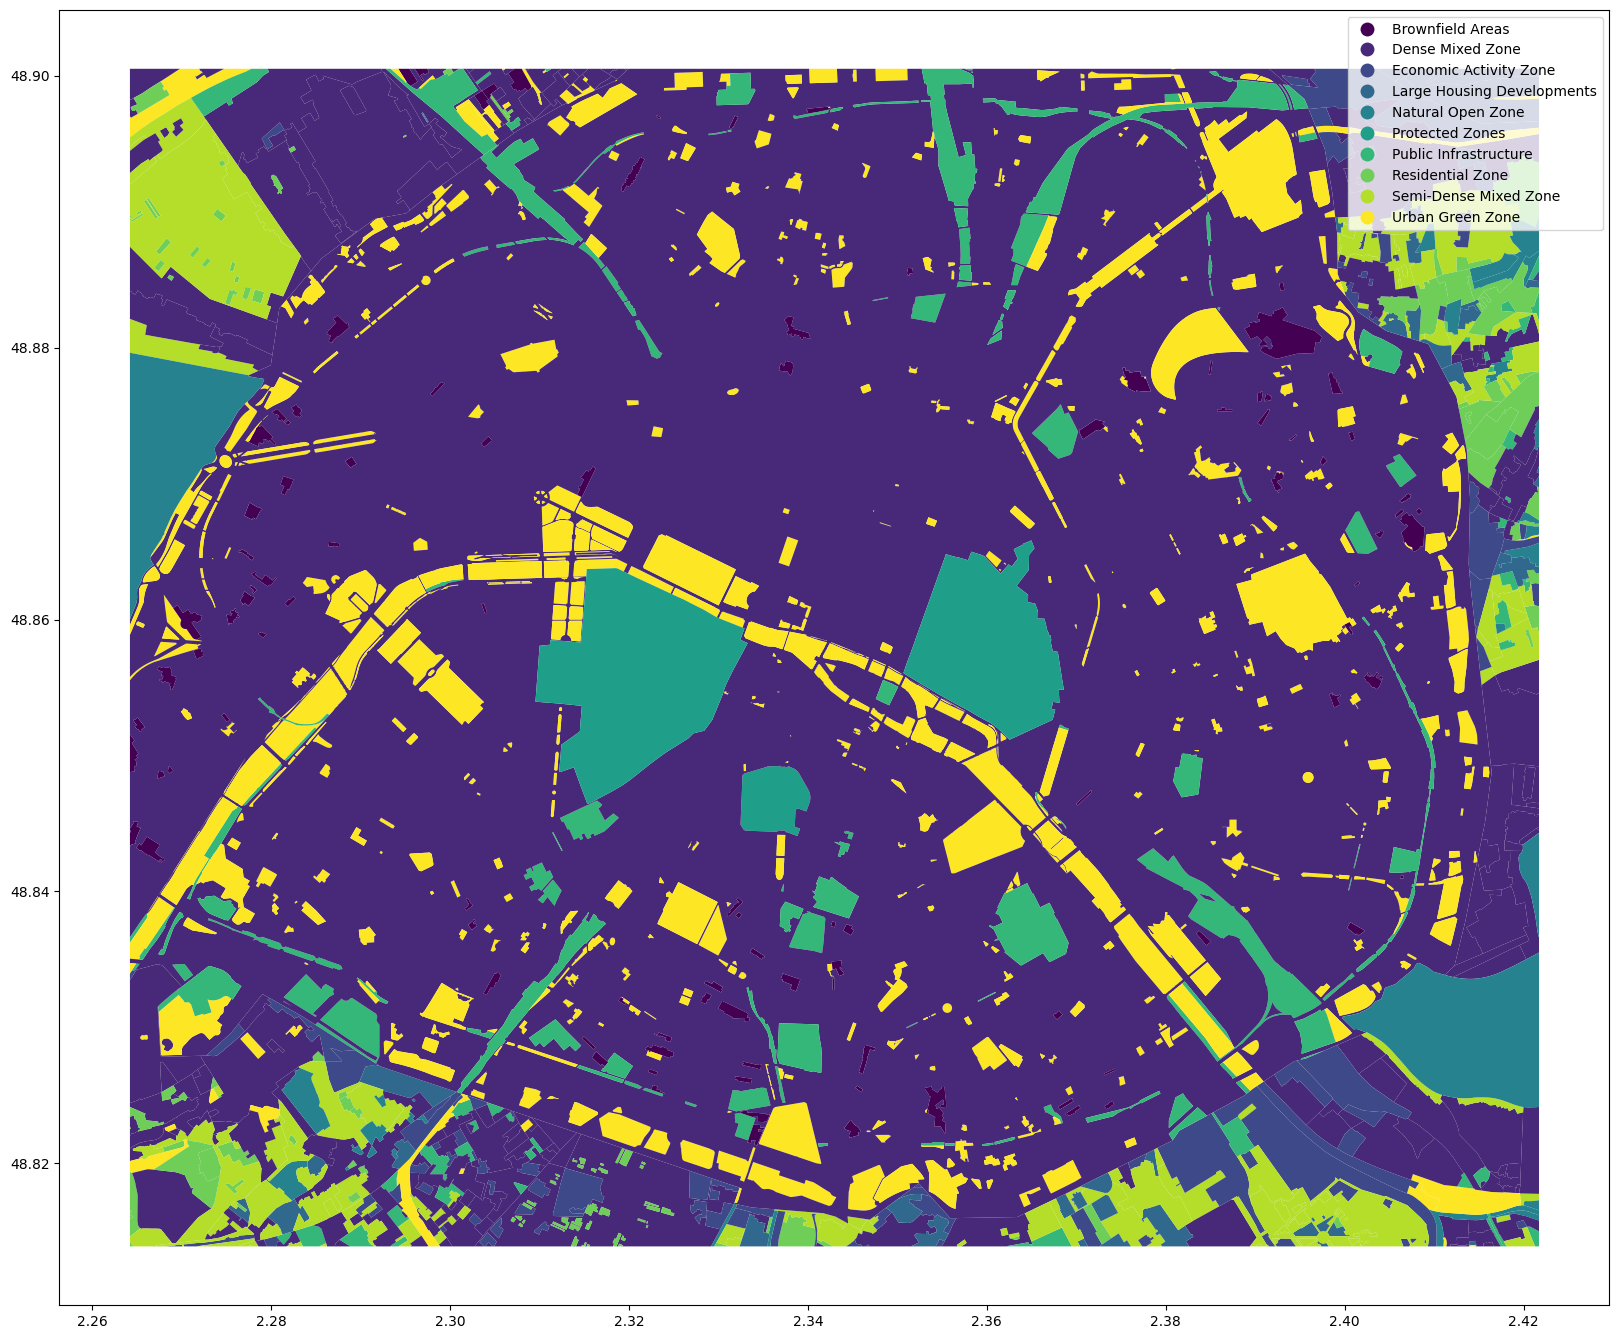

In [10]:
get_map(paris_clipped)

# Storing the Total Area of Landuse by category, on the whole of Paris and clipped Area

## Total Area

In [11]:
landuse_total = {}
for category in paris_gpd.categories.unique():
    landuse_total[category] = paris_gpd[paris_gpd['categories'] == category].Shape_Area.sum()
    
landuse_total

{'Residential Zone': 187809890.4311229,
 'Dense Mixed Zone': 166942015.9307216,
 'Public Infrastructure': 37391131.17985752,
 'Semi-Dense Mixed Zone': 78630744.36697888,
 'Economic Activity Zone': 112544907.59075111,
 'Natural Open Zone': 134277016.7533502,
 'Urban Green Zone': 24923290.112416185,
 'Large Housing Developments': 46252916.28345169,
 'Brownfield Areas': 6640759.966220245,
 'Agricultural Zone': 15950951.03827911,
 'Protected Zones': 3496832.7832998624}

## Clipped Area

In [12]:
landuse_clipped = {}
for category in paris_clipped.categories.unique():
    landuse_clipped[category] = paris_clipped[paris_clipped['categories'] == category].Shape_Area.sum()
    
landuse_clipped

{'Dense Mixed Zone': 88038952.31806064,
 'Public Infrastructure': 5234241.971977331,
 'Natural Open Zone': 19378903.949857086,
 'Urban Green Zone': 10731587.366555002,
 'Brownfield Areas': 1005971.8138671266,
 'Residential Zone': 1936814.9080649922,
 'Economic Activity Zone': 4077332.791054147,
 'Large Housing Developments': 1405219.9317324078,
 'Semi-Dense Mixed Zone': 7053082.519147673,
 'Protected Zones': 3496832.7832998624}

# Splitting the GeoPandas DataFrame into Pixels instead of the Polygons

In [28]:
from modules.ml_logic.utils import import_bb_array, get_sub_tiles
from modules.data_aggregation.land_coverage import get_landuse, split_Geo_df_and_get_landuse
import pandas as pd

## Total Data

### Using the split_GeoDataFrame_smaller_pixels method we will get the split DataFrame which has more rows

In [27]:
from ast import literal_eval
paris_df = pd.read_csv("../../data/processed_data/Paris/Paris.csv")
working_df = paris_df.copy()
working_df['bb'] = paris_df.bb.apply(literal_eval)

In [26]:
pixels= working_df.bb

In [89]:
test = split_GeoDataFrame_smaller_pixels(paris_clipped, pixels, chunk_size = 100, testing =True)

<AxesSubplot: >

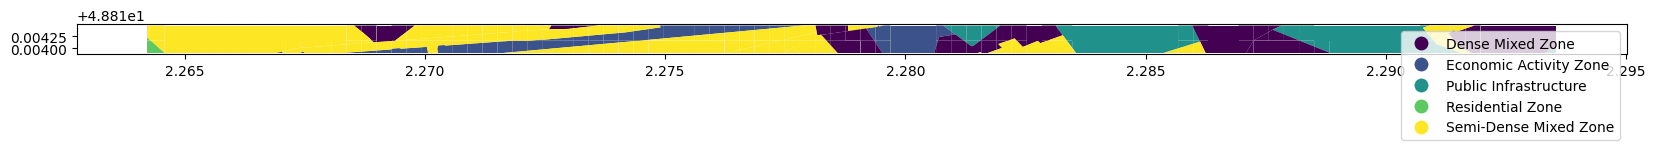

In [135]:
get_map(test)

In [136]:
test.head()

,OBJECTID,c_zonage,c_zonage_brut,Shape_Length,Shape_Area,categories,geometry,geometry_coordinates
7845,124105,3,UE,2827.751374,81272.013780,Residential Zone,"POLYGON ((2.26422 48.81390, 2.26422 48.81415, ...","[(2.25647577431954, 48.817031117244184), (2.25..."
5447,121707,6,UD,877.492703,43197.408309,Semi-Dense Mixed Zone,"POLYGON ((2.26458 48.81390, 2.26429 48.81415, ...","[(2.265386893145874, 48.81522364486357), (2.26..."
7845,124105,3,UE,2827.751374,81272.013780,Residential Zone,"POLYGON ((2.26427 48.81390, 2.26427 48.81415, ...","[(2.25647577431954, 48.817031117244184), (2.25..."
5447,121707,6,UD,877.492703,43197.408309,Semi-Dense Mixed Zone,"POLYGON ((2.26422 48.81422, 2.26422 48.81447, ...","[(2.265386893145874, 48.81522364486357), (2.26..."
7845,124105,3,UE,2827.751374,81272.013780,Residential Zone,"POLYGON ((2.26422 48.81422, 2.26427 48.81417, ...","[(2.25647577431954, 48.817031117244184), (2.25..."


## Clipped Data

### Using the split_GeoDataFrame_smaller_pixels method we will get the split DataFrame which has more rows

# Getting the landuse coverage/pixel for the **clipped** data

Since we have to run get_landuse_coverage for all of the different categories, we have to split the test_clipped dataframe into 11 different dataframes based on the landuse

In [15]:
working_df.head()

,LST,ele,LST_diff,ele_diff,ul_corner,ll_corner,lr_corner,ur_corner,bb
0,28.489990,45.577310,-2.315979,-28.184334,"[[2.2633263464873545, 48.81321032181281]]","[[2.2633263464873545, 48.813839888049166]]","[[2.2639559127237074, 48.813839888049166]]","[[2.2639559127237074, 48.81321032181281]]","[[2.2633263464873545, 48.81321032181281], [2.2..."
1,28.549988,45.577430,-2.255981,-28.184212,"[[2.2639559127237074, 48.81321032181281]]","[[2.2639559127237074, 48.813839888049166]]","[[2.2645854789600603, 48.813839888049166]]","[[2.2645854789600603, 48.81321032181281]]","[[2.2639559127237074, 48.81321032181281], [2.2..."
2,28.450012,46.947140,-2.355957,-26.814503,"[[2.2645854789600603, 48.81321032181281]]","[[2.2645854789600603, 48.813839888049166]]","[[2.2652150451964133, 48.813839888049166]]","[[2.2652150451964133, 48.81321032181281]]","[[2.2645854789600603, 48.81321032181281], [2.2..."
3,29.230011,48.411680,-1.575958,-25.349964,"[[2.2652150451964133, 48.81321032181281]]","[[2.2652150451964133, 48.813839888049166]]","[[2.265844611432766, 48.813839888049166]]","[[2.265844611432766, 48.81321032181281]]","[[2.2652150451964133, 48.81321032181281], [2.2..."
4,27.889984,48.643574,-2.915985,-25.118069,"[[2.265844611432766, 48.81321032181281]]","[[2.265844611432766, 48.813839888049166]]","[[2.266474177669119, 48.813839888049166]]","[[2.266474177669119, 48.81321032181281]]","[[2.265844611432766, 48.81321032181281], [2.26..."


In [72]:
temp = get_landuse(test)

In [64]:
temp['sum'].value_counts()

0.000000    34981
0.907695       27
0.907695       10
0.907695        8
0.532707        1
0.907695        1
Name: sum, dtype: int64

In [20]:
pixels_p0 = pixels[:1000]

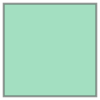

In [21]:
Polygon(working_df.bb[0])

In [157]:
part_2 = split_GeoDataFrame_smaller_pixels(paris_clipped, pixels = pixels[13000:14000], chunk_size = 100, testing =False)

In [158]:
temp_2 = get_landuse(part_2)

In [143]:
temp_2['sum'].value_counts()

0.000000    34032
1.000000      882
1.000000       48
1.000000       20
1.000000        9
0.591722        4
0.586879        4
0.999956        1
0.741462        1
0.567012        1
0.686749        1
1.000000        1
0.986812        1
0.579126        1
0.805521        1
0.747128        1
0.999993        1
0.840036        1
0.891596        1
0.858672        1
0.941656        1
0.762023        1
0.714356        1
0.931719        1
0.493143        1
0.886543        1
0.995963        1
0.751354        1
0.602139        1
0.469343        1
0.658630        1
0.994680        1
0.993932        1
0.598854        1
0.847263        1
1.000000        1
Name: sum, dtype: int64

In [118]:
len(working_df.bb[2000:3000])

1000

In [159]:
temp_2.to_csv("../../data/processed_data/Paris/processed_landuse/Paris_landuse_13000_14000.csv")

In [25]:
indexes = list(range(16, 36, 1))
split_Geo_df_and_get_landuse(indexes)

getting the data for slices:  16000 17000
getting the landuse for slices:  16000 17000
saving the csv for slices:  16000 17000
getting the data for slices:  17000 18000
getting the landuse for slices:  17000 18000
saving the csv for slices:  17000 18000
getting the data for slices:  18000 19000
getting the landuse for slices:  18000 19000
saving the csv for slices:  18000 19000
getting the data for slices:  19000 20000
getting the landuse for slices:  19000 20000
saving the csv for slices:  19000 20000
getting the data for slices:  20000 21000
getting the landuse for slices:  20000 21000
saving the csv for slices:  20000 21000
getting the data for slices:  21000 22000
getting the landuse for slices:  21000 22000
saving the csv for slices:  21000 22000
getting the data for slices:  22000 23000
getting the landuse for slices:  22000 23000
saving the csv for slices:  22000 23000
getting the data for slices:  23000 24000
getting the landuse for slices:  23000 24000
saving the csv for slice

In [29]:
final = pd.read_csv('../../data/processed_data/Paris/processed_landuse/Paris_landuse.csv')

In [33]:
landuse_clipped

{'Dense Mixed Zone': 88038952.31806064,
 'Public Infrastructure': 5234241.971977331,
 'Natural Open Zone': 19378903.949857086,
 'Urban Green Zone': 10731587.366555002,
 'Brownfield Areas': 1005971.8138671266,
 'Residential Zone': 1936814.9080649922,
 'Economic Activity Zone': 4077332.791054147,
 'Large Housing Developments': 1405219.9317324078,
 'Semi-Dense Mixed Zone': 7053082.519147673,
 'Protected Zones': 3496832.7832998624}

In [43]:
final.zone_5.sum()

23668.244080327735